# Libraries

In [1]:
import gdown
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

from mpl_toolkits.mplot3d import Axes3D

In [2]:
df_file_id = '1GPbKF96FZgIIBIiv3Y7tpu7I-Jf4Uixb'

df_output_file = '/content/train.csv'

df_download_url = f'https://drive.google.com/uc?id={df_file_id}'

gdown.download(df_download_url, df_output_file, quiet=False)

df = pd.read_csv(df_output_file, sep='\t')

Downloading...
From: https://drive.google.com/uc?id=1GPbKF96FZgIIBIiv3Y7tpu7I-Jf4Uixb
To: /content/train.csv
100%|██████████| 220k/220k [00:00<00:00, 26.5MB/s]


# Data Information

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
obj = [col for col in df.columns if df[col].nunique() <= 10]
for col in obj:
  print(f"====={col}=====")
  unique_values = df[col].unique()
  n_unique_values = df[col].nunique()

  print(f"Unique values in {col}: {unique_values}")
  print(f"Number of unique values in {col}: {n_unique_values}\n")

=====Education=====
Unique values in Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Number of unique values in Education: 5

=====Marital_Status=====
Unique values in Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Number of unique values in Marital_Status: 8

=====Kidhome=====
Unique values in Kidhome: [0 1 2]
Number of unique values in Kidhome: 3

=====Teenhome=====
Unique values in Teenhome: [0 1 2]
Number of unique values in Teenhome: 3

=====AcceptedCmp3=====
Unique values in AcceptedCmp3: [0 1]
Number of unique values in AcceptedCmp3: 2

=====AcceptedCmp4=====
Unique values in AcceptedCmp4: [0 1]
Number of unique values in AcceptedCmp4: 2

=====AcceptedCmp5=====
Unique values in AcceptedCmp5: [0 1]
Number of unique values in AcceptedCmp5: 2

=====AcceptedCmp1=====
Unique values in AcceptedCmp1: [0 1]
Number of unique values in AcceptedCmp1: 2

=====AcceptedCmp2=====
Unique values in AcceptedCmp2: [0 1]
Number of unique value

# Data Cleaning

In [7]:
clean = []
for col in df.columns:
  info = {
      'columns': col,
      'null_count': df[col].isnull().sum()
  }
  clean.append(info)

data = pd.DataFrame(clean)
data

,columns,null_count
0,ID,0
1,Year_Birth,0
2,Education,0
3,Marital_Status,0
4,Income,24
5,Kidhome,0
6,Teenhome,0
7,Dt_Customer,0
8,Recency,0
9,MntWines,0


## Handling Missing Values

In [8]:
df = df.dropna()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Checking duplicate data

In [9]:
df.duplicated().sum()

0

# Feature Engineering

In [10]:
from datetime import datetime
df['Age'] = datetime.now().year - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Registration_Year'] = df['Dt_Customer'].dt.year
df['Years_Since_Registration'] = datetime.now().year - df['Registration_Year']

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Registration_Year,Years_Since_Registration
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,67,2012,12
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,70,2014,10
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,59,2013,11
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,40,2014,10
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,43,2014,10


In [11]:
df['Marital_Status'] = df["Marital_Status"].replace({"Married": "Partner", "Together": "Partner", "Absurd": "Alone", "Widow": "Alone",
                                                     "YOLO": "Alone", "Divorced": "Alone", "Single": "Alone"
                                                     })

df["Education"] = df["Education"].replace({"2n Cycle": "Master"})

df['Family_Size'] = (df['Marital_Status'].replace({'Alone': 1, 'Partner': 2}) + df['Kidhome'] + df['Teenhome'])

df["Total_Mnt"] = (df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"])

df['Total_Accepted'] = (df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response'])

df['Total_Purchases'] = (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Registration_Year,Years_Since_Registration,Family_Size,Total_Mnt,Total_Accepted,Total_Purchases
0,5524,1957,Graduation,Alone,58138.0,0,0,2012-09-04,58,635,...,3,11,1,67,2012,12,1,1617,1,22
1,2174,1954,Graduation,Alone,46344.0,1,1,2014-03-08,38,11,...,3,11,0,70,2014,10,3,27,0,4
2,4141,1965,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,3,11,0,59,2013,11,2,776,0,20
3,6182,1984,Graduation,Partner,26646.0,1,0,2014-02-10,26,11,...,3,11,0,40,2014,10,3,53,0,6
4,5324,1981,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,3,11,0,43,2014,10,3,422,0,14


## Remove unnecessary features

In [12]:
df.drop(['Year_Birth', 'ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer', 'Registration_Year'], axis=1, inplace=True)

# EDA

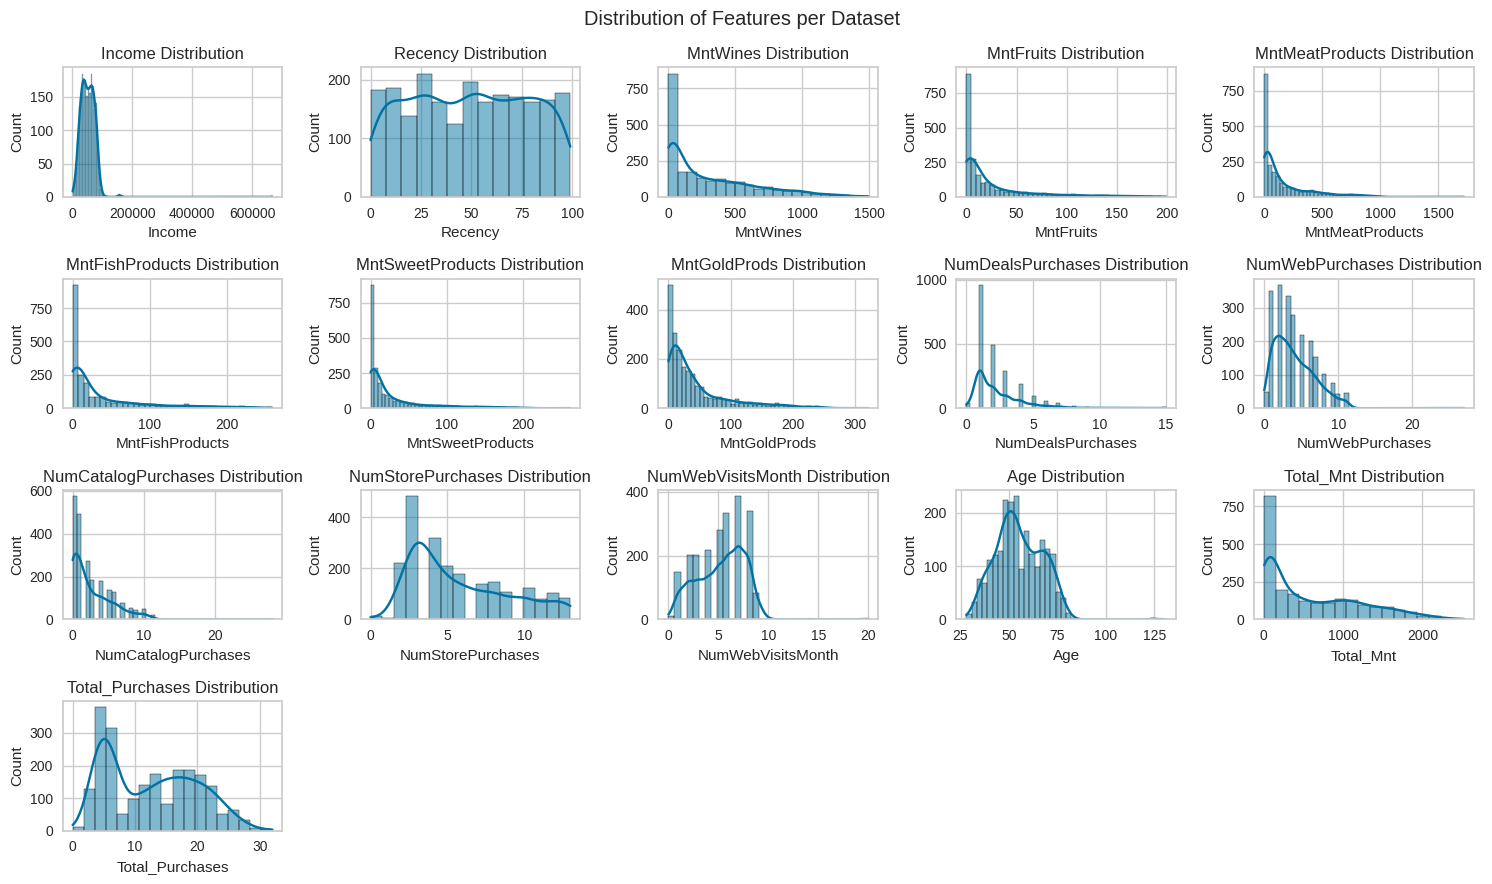

In [13]:
columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64'] and df[col].nunique() >= 10 and col not in ['ID']]
fig, axes = plt.subplots(4, 5, figsize = (15, 9))
axes =  axes.flatten()

for i, col in enumerate(columns):
  ax = sns.histplot(data = df, x = col, ax = axes[i], kde = True)
  ax.set_title(f"{col} Distribution")
  ax.set_xlabel(f"{col}")

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

fig.suptitle('Distribution of Features per Dataset')
plt.tight_layout()
plt.show()

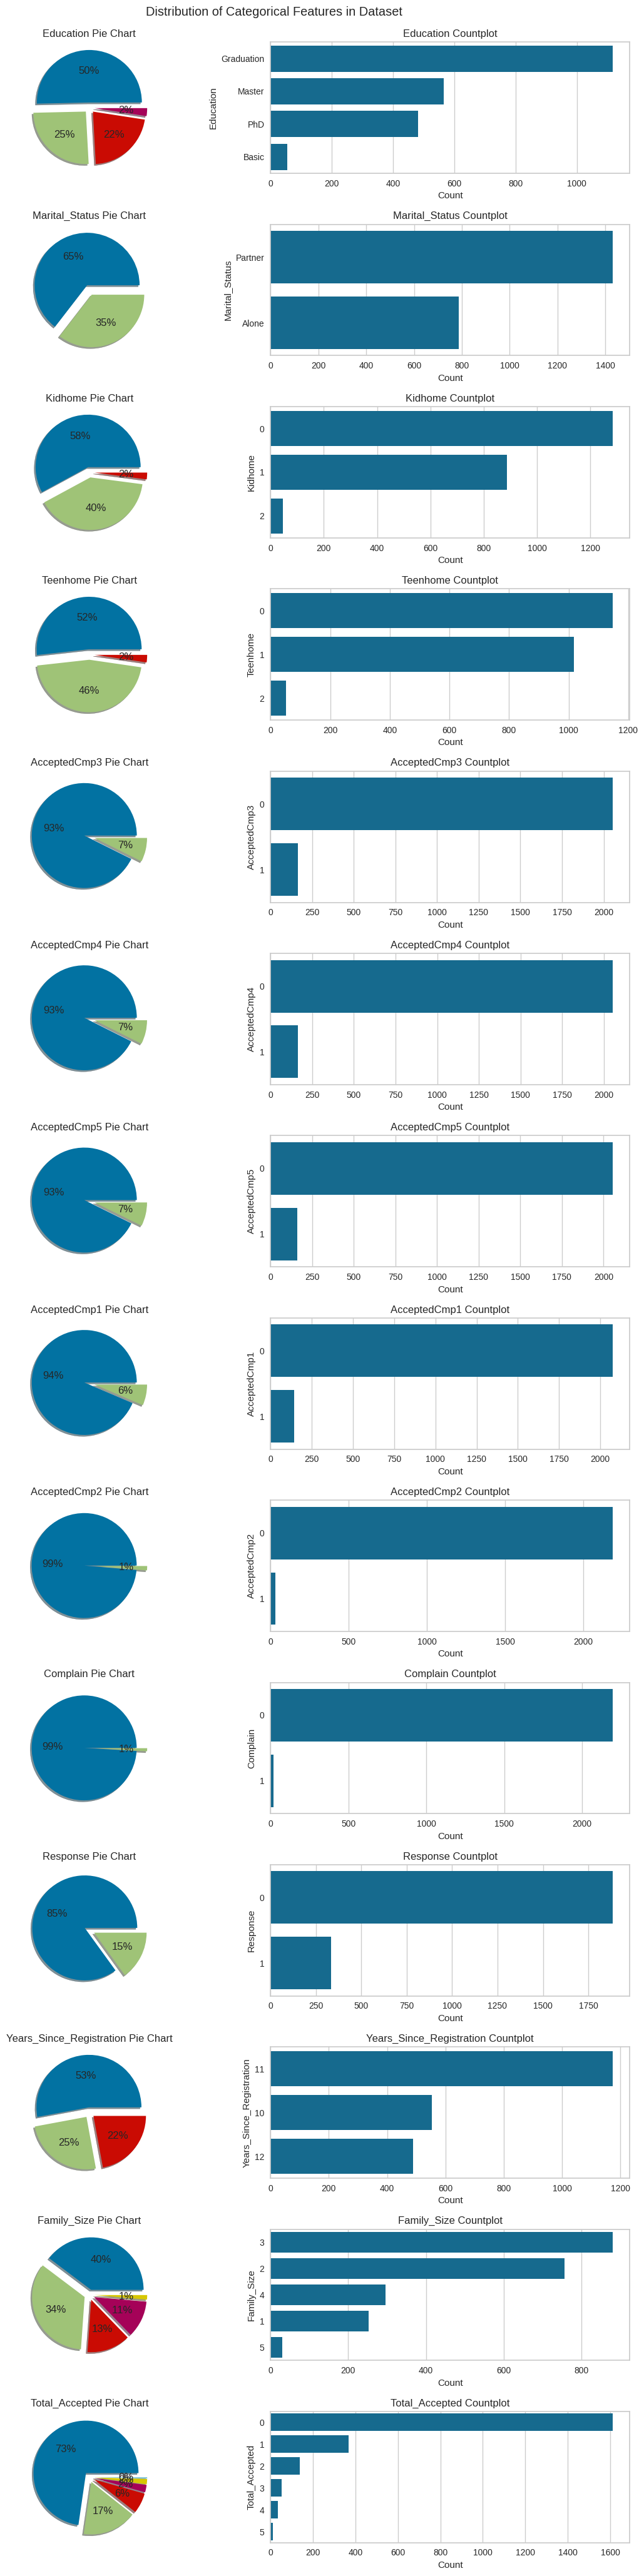

In [14]:
obj = [col for col in df.columns if df[col].nunique() < 10]

fig, axes = plt.subplots(len(obj), 2, figsize=(12, 3 * len(obj)))

for i, column in enumerate(obj):
  ax = axes[i, 0]
  ax.pie(
      df[column].value_counts(),
      shadow=True,
      explode=[0.1 for _ in range(df[column].nunique())],
      autopct='%1.f%%'
  )
  ax.set_aspect('equal')
  ax.set_title(f'{column} Pie Chart')

  ax1 = axes[i, 1]
  sns.countplot(y=column, ax=ax1, order=df[column].value_counts().index, data=df)
  ax1.set_xlabel('Count')
  ax1.set_ylabel(column)
  ax1.set_title(f'{column} Countplot')

fig.suptitle('Distribution of Categorical Features in Dataset\n\n\n')
plt.tight_layout()
plt.show()

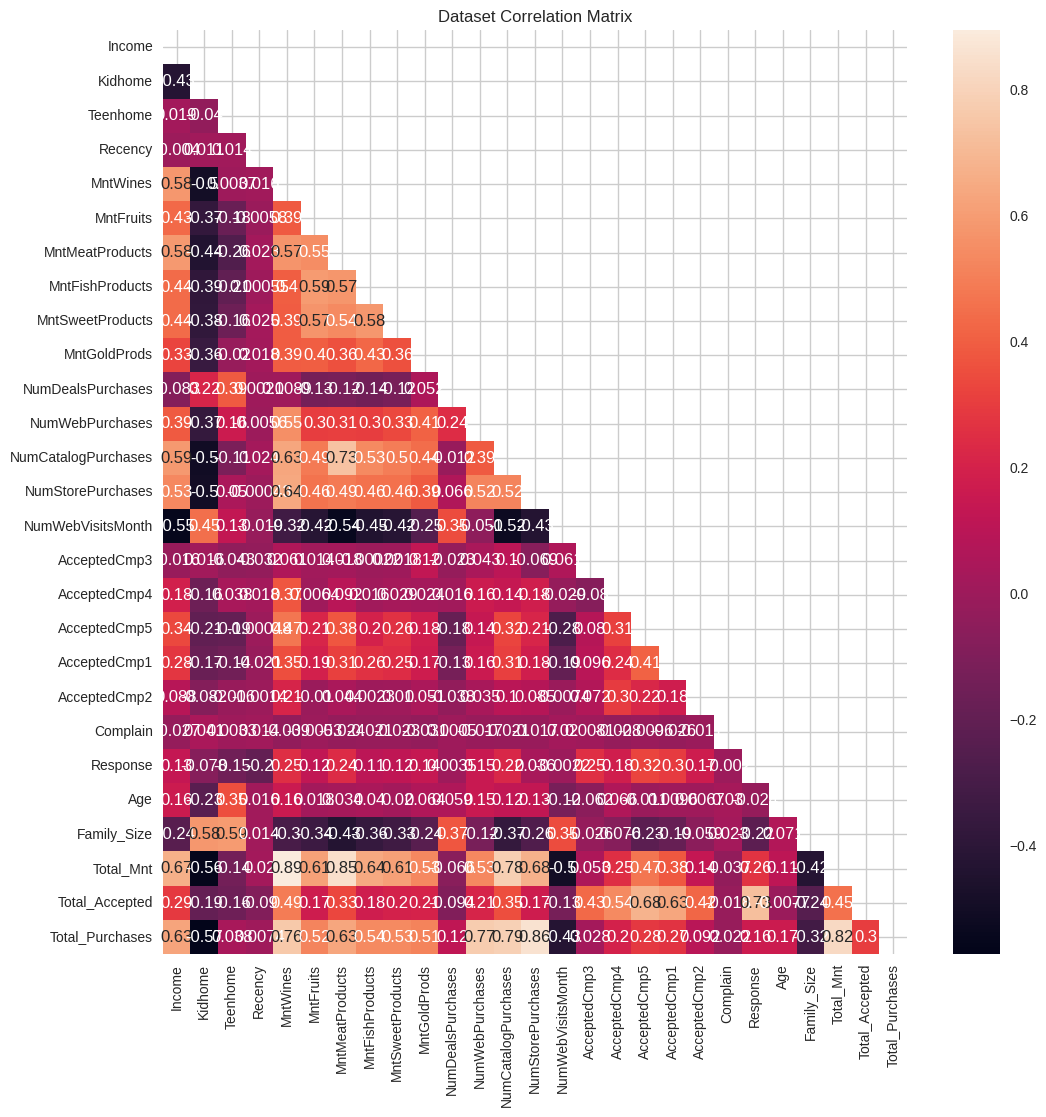

In [15]:
columns = [col for col in df.columns if col not in ['ID'] and df[col].dtype in ['int64', 'float64']]

corr = df[columns].corr()
plt.figure(figsize=(12, 12))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True)
plt.title('Dataset Correlation Matrix')
plt.show()

## Encoding

In [16]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

def encoder(df, method, cat_cols):
  df_copy = df.copy()

  if method == 'Ordinal':
    encoder = OrdinalEncoder()
    df_copy[cat_cols] = encoder.fit_transform(df_copy[cat_cols])

  elif method == 'Label':
    encoder = LabelEncoder()
    for col in cat_cols:
      df_copy[col] = encoder.fit_transform(df_copy[col])

  elif method == 'One Hot':
    df_copy = pd.get_dummies(df_copy, columns=cat_cols)

  return df_copy

In [17]:
df = encoder(df, method='Label', cat_cols=['Marital_Status'])
df = encoder(df, method='Ordinal', cat_cols=['Education'])

# Scalling

In [18]:
scaler = StandardScaler()
scale = scaler.fit_transform(df)
df1 = pd.DataFrame(scale, columns = df.columns)

# Dimensionality Reduction

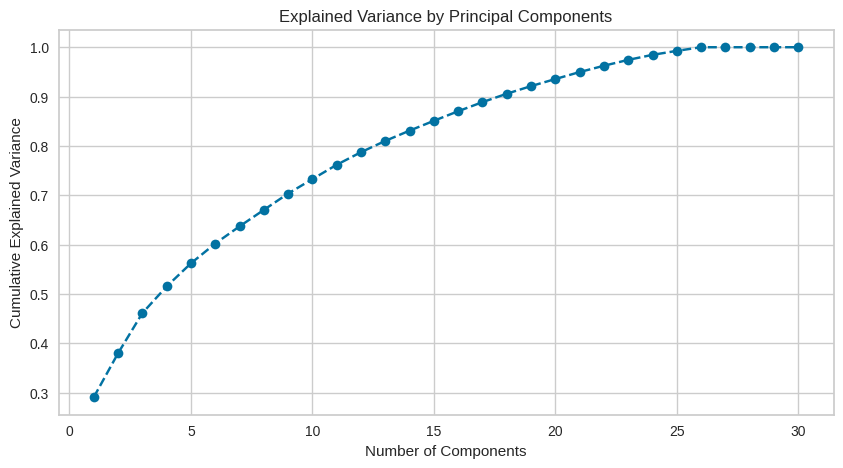

In [19]:
pca = PCA()
df_pca = pca.fit(df1)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

In [20]:
threshold = 0.90
n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1

n_components

18

In [21]:
pca = PCA(n_components=18)
df_pca = pca.fit(df1)
new_df_pca = pca.transform(df1)

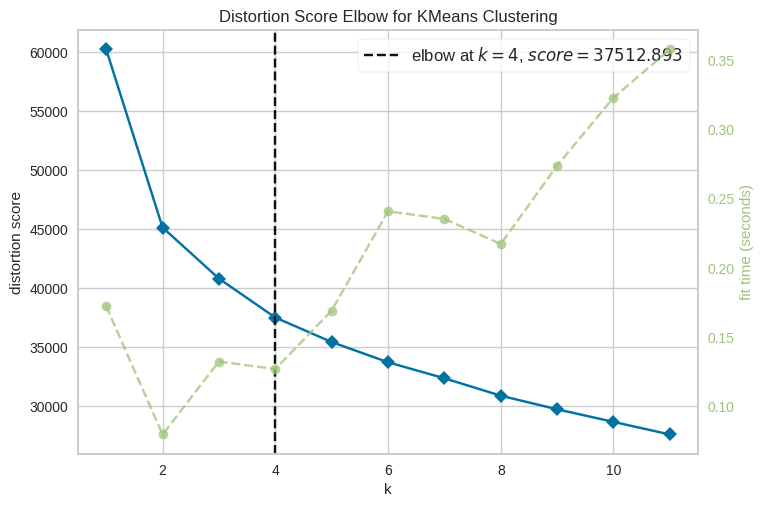

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
model = KMeans(n_init=10)
elbow = KElbowVisualizer(model, k=(1, 12))
elbow.fit(new_df_pca)
elbow.show()

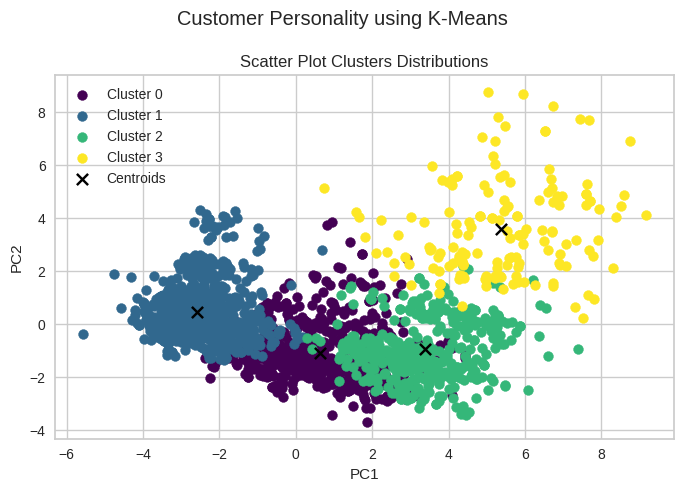

In [23]:
kmeans = KMeans(n_clusters=4, n_init=10)
y_kmeans = kmeans.fit_predict(new_df_pca)

colors = plt.cm.viridis(np.linspace(0, 1, len(np.unique(y_kmeans))))

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
for i in np.unique(y_kmeans):
    ax.scatter(new_df_pca[y_kmeans == i, 0], new_df_pca[y_kmeans == i, 1], s=50, color=colors[i], label=f'Cluster {i}')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=65, marker='x', label='Centroids', color='black')

ax.set_title('Scatter Plot Clusters Distributions')
ax.legend()
fig.suptitle('Customer Personality using K-Means')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.tight_layout()
plt.show()

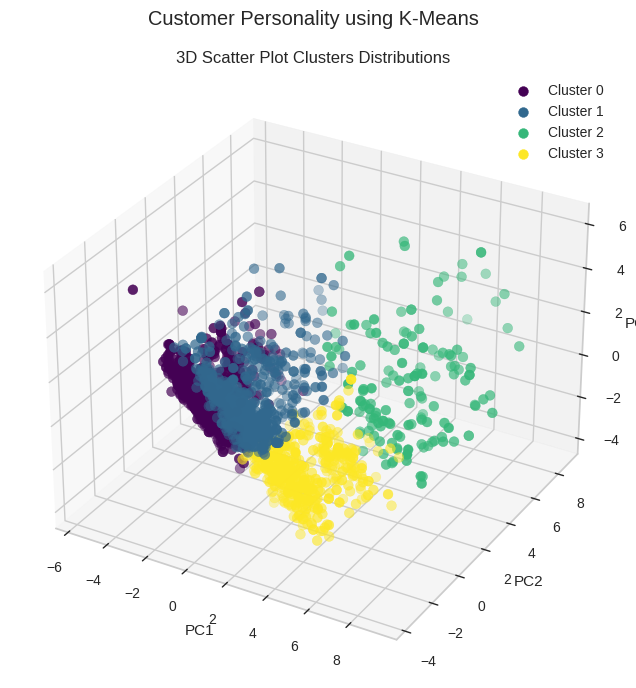

In [24]:
kmeans = KMeans(n_clusters=4, n_init=10)
y_kmeans = kmeans.fit_predict(new_df_pca)

colors = plt.cm.viridis(np.linspace(0, 1, len(np.unique(y_kmeans))))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i in np.unique(y_kmeans):
    ax.scatter3D(new_df_pca[y_kmeans == i, 0], new_df_pca[y_kmeans == i, 1], new_df_pca[y_kmeans == i, 2], s=50, color=colors[i], label=f'Cluster {i}')

ax.set_title('3D Scatter Plot Clusters Distributions')
ax.legend()
fig.suptitle('Customer Personality using K-Means')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.tight_layout()
plt.show()